In [1]:
import h5py
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import cross_validate, KFold

In [2]:
test_size    = 0.20
h5_color     = 'C:/Users/JOSE/Documents/Septimo/Mineria/Image_processing/DatosFinales/Dataset_Transformado/Datos_no_aumentados/color_features.h5'
h5_colorLb   = 'C:/Users/JOSE/Documents/Septimo/Mineria/Image_processing/DatosFinales/Dataset_Transformado/Datos_no_aumentados/color_features_labels.h5'
h5_texture   = 'C:/Users/JOSE/Documents/Septimo/Mineria/Image_processing/DatosFinales/Dataset_Transformado/Datos_no_aumentados/textural_features.h5'
h5_textureLb = 'C:/Users/JOSE/Documents/Septimo/Mineria/Image_processing/DatosFinales/Dataset_Transformado/Datos_no_aumentados/textural_features_labels.h5'
scoring      = {'accuracy' : make_scorer(accuracy_score),
                'f1_score' : make_scorer(f1_score, average = 'weighted'), 
                'precision' : make_scorer(precision_score, average = 'weighted'),
                'recall' : make_scorer(recall_score, average = 'weighted')}

In [3]:
#cargar los datos
h5f_color   = h5py.File(h5_color, 'r')
h5f_colorLb = h5py.File(h5_colorLb, 'r')

color_features_string          = h5f_color['Pest_Color_Features']
color_features_labels_string   = h5f_colorLb['Pest_Color_Features_Labels']

color_features = np.array(color_features_string)
color_features_labels  = np.array(color_features_labels_string)

h5f_color.close()
h5f_colorLb.close()

# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(color_features.shape))
print("[STATUS] labels shape: {}".format(color_features_labels.shape))

[STATUS] features shape: (4062, 512)
[STATUS] labels shape: (4062,)


In [4]:
h5f_texture  = h5py.File(h5_texture, 'r')
h5f_textureLb = h5py.File(h5_textureLb, 'r')

textural_features_string          = h5f_texture['Pest_Textural_Features']
textural_features_labels_string   = h5f_textureLb['Pest_Textural_Features_Labels']

textural_features = np.array(textural_features_string )
textural_features_labels  = np.array(textural_features_labels_string)

h5f_texture.close()
h5f_textureLb.close()

# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(textural_features.shape))
print("[STATUS] labels shape: {}".format(textural_features_labels.shape))

print("[STATUS] training started...")

[STATUS] features shape: (4062, 13)
[STATUS] labels shape: (4062,)
[STATUS] training started...


In [5]:
global_features = np.hstack([color_features, textural_features])
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(textural_features_labels.shape))

[STATUS] features shape: (4062, 525)
[STATUS] labels shape: (4062,)


In [6]:
# reconocer x y y
X = global_features
y = color_features_labels

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size   = test_size,
                                        random_state = 5)

X_train.shape, X_test.shape

((3249, 525), (813, 525))

In [8]:
#svm
sigmoid_param_grid = {
        "kernel": ["sigmoid"],
        "gamma": ["auto", "scale"],
        "C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
        "decision_function_shape": ['ovo', 'ovr']
}

In [10]:
svm_sigmoid = GridSearchCV(svm.SVC(), sigmoid_param_grid)
history = svm_sigmoid.fit(X_train,y_train)

In [11]:
y_pred = svm_sigmoid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy (Sigmoid Kernel): ', "%.2f" % (accuracy*100))
print('F1 (Sigmoid Kernel): ', "%.2f" % (f1*100))
print('Precision (Sigmoid Kernel): ', "%.2f" % (precision*100))
print('Recall (Sigmoid Kernel): ', "%.2f" % (recall*100))

Accuracy (Sigmoid Kernel):  94.22
F1 (Sigmoid Kernel):  94.24
Precision (Sigmoid Kernel):  94.29
Recall (Sigmoid Kernel):  94.22


# Cross Validation

In [13]:
results = cross_validate(estimator=svm_sigmoid, X=X_train, y=y_train, cv=8, scoring=scoring)

print('Accuracy (Sigmoid Kernel): ', "%.2f" % (np.mean(results['test_accuracy'])*100))
print('F1 (Sigmoid Kernel): ', "%.2f" % (np.mean(results['test_f1_score'])*100))
print('Precision (Sigmoid Kernel): ', "%.2f" % (np.mean(results['test_precision'])*100))
print('Recall (Sigmoid Kernel): ', "%.2f" % (np.mean(results['test_recall'])*100))

KeyboardInterrupt: 

# Matriz de Confusión

In [16]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

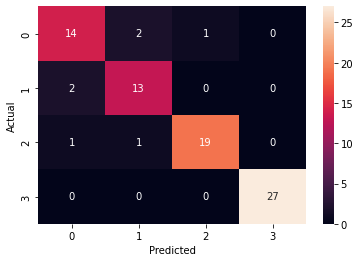

In [17]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()